In [2]:
import mysql.connector
import pandas as pd


In [7]:
host = "127.0.0.1"
user = "root"
password = "Data@mit207"
database = "db1"
try:
    connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)
except mysql.connector.Error as err:
    print(f"Error: {err}")

In [8]:
query = "SELECT * FROM statment_table"
data = pd.read_sql(query, connection)


C:\Users\mital\AppData\Local\Temp\ipykernel_22260\393692225.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)


In [9]:
connection.close()
data.head()

,Date,Narration,Chq/Ref_No,Value_Dt,Withdrawal_amt,Deposit_amt,Closing_Balance
0,15/11/21,Transaction 1,MIR2231112059632,15/11/21,3.54,,22027.20
1,01/01/22,Transaction 2,000000000000000,31/12/21,,167,22194.20
2,24/02/22,Transaction 3,MIR2205117857402,24/02/22,3.54,,22190.66
3,06/03/22,Transaction 4,0000206582647629,06/03/22,,1,22191.66
4,06/03/22,Transaction 5,0000206522203538,06/03/22,,1,22192.66


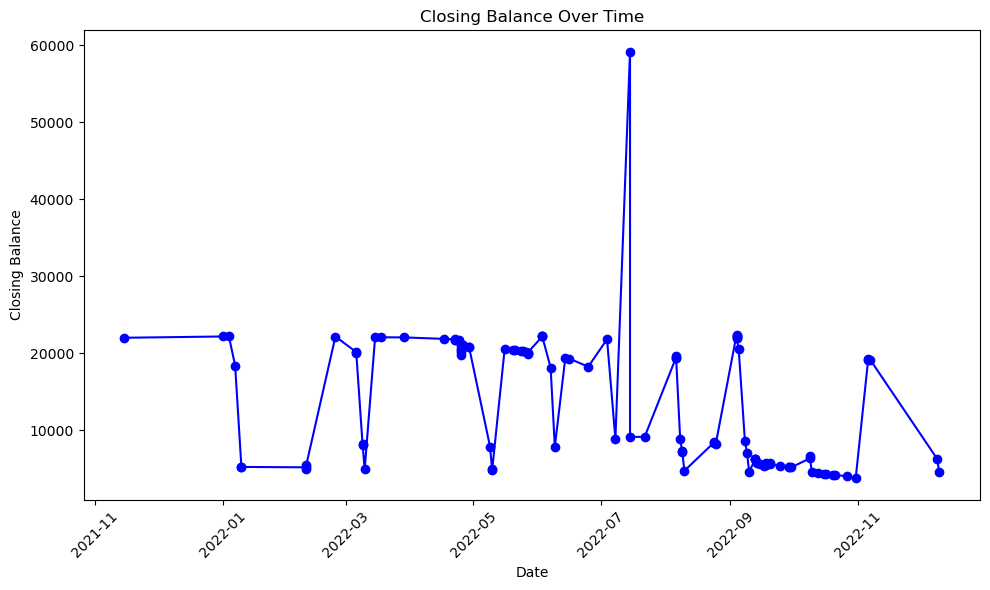

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'])
df['Value_Dt'] = pd.to_datetime(df['Value_Dt'])

df = df.sort_values(by='Date')

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Closing_Balance'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Closing Balance')
plt.title('Closing Balance Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


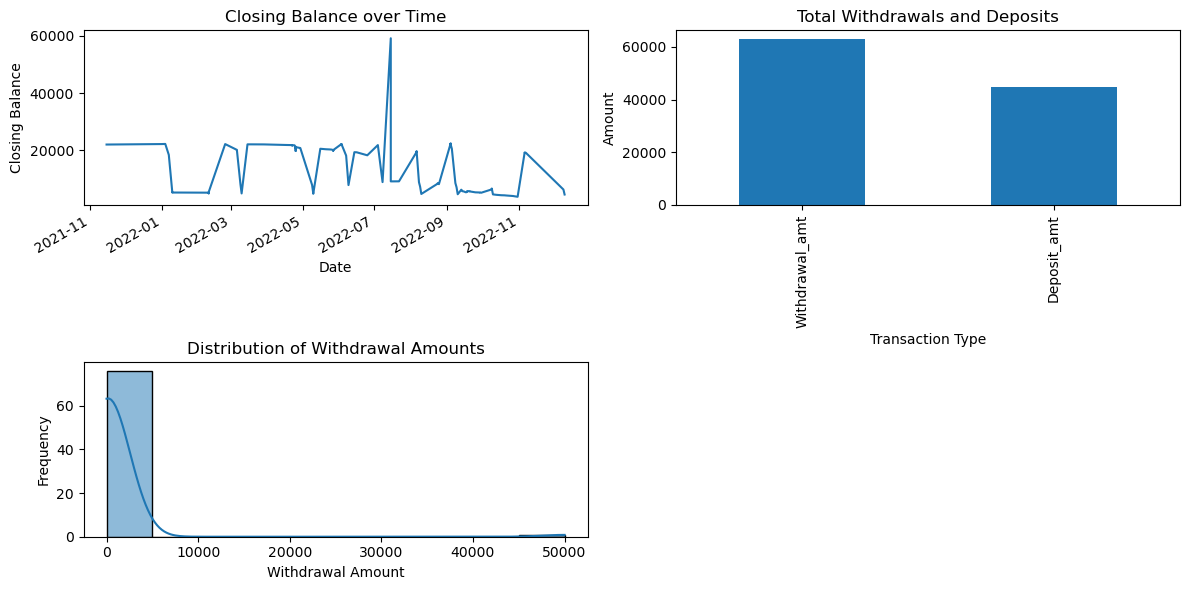

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


columns = ["Date", "Narration", "Chq/Ref_No", "Value_Dt", "Withdrawal_amt", "Deposit_amt", "Closing_Balance", 
           "Withdrawal_Z_Score", "Deposit_Z_Score"]
df = pd.DataFrame(data, columns=columns)

df["Date"] = pd.to_datetime(df["Date"])
df["Value_Dt"] = pd.to_datetime(df["Value_Dt"])

df.set_index("Date", inplace=True)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
df["Closing_Balance"].plot()
plt.title("Closing Balance over Time")
plt.xlabel("Date")
plt.ylabel("Closing Balance")

plt.subplot(2, 2, 2)
df[["Withdrawal_amt", "Deposit_amt"]].sum().plot(kind="bar")
plt.title("Total Withdrawals and Deposits")
plt.xlabel("Transaction Type")
plt.ylabel("Amount")

plt.subplot(2, 2, 3)
sns.histplot(df["Withdrawal_amt"], bins=10, kde=True)
plt.title("Distribution of Withdrawal Amounts")
plt.xlabel("Withdrawal Amount")
plt.ylabel("Frequency")


plt.tight_layout()
plt.show()
